# Integrated Project - Games Data Analysis

## Introduction

You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.

In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017. 

The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

## Imports

Explain the libaries and packages used. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

##  Loading



In [2]:
# Loading the dataset

try:
    # Try to load the file from the local computer
    df = pd.read_csv('./datasets/games.csv')
    print("File loaded from local computer.")
    
except FileNotFoundError:
    try:
        df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')
        print("File loaded from the server.")
    except Exception as e:
        raise RuntimeError("❌ Failed to load dataset from both local and remote sources.\n Original error:", e)

File loaded from local computer.


# Preprocessing


In [3]:
# Displaying the first few rows of the dataset
df.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
# Review the size of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# More information about the size
df.shape

(16715, 11)

In [6]:
# Check the unique items per column
df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

## Check for null values and duplicates

In [7]:
# Convert column names to lowercase
df.columns = df.columns.str.lower()

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# Look for NaN values
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

## The 'name' column

There are two NaNs and with so many unique values, probably some typos, extra characters, etc. 

My plan is to replace the NaN values, convert the column to a string, and then try to tidy the list of names. 


In [10]:
# Examine the 'name' column
df['name'].value_counts()

name
Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: count, Length: 11559, dtype: int64

In [11]:
df['name'].sort_values(ascending=False).head(30)

9134       ¡Shin Chan Flipa en colores!
475          wwe Smackdown vs. Raw 2006
15612      uDraw Studio: Instant Artist
8280       uDraw Studio: Instant Artist
645                        uDraw Studio
16494        thinkSMART: Chess for Kids
14453                thinkSMART FAMILY!
10843                        thinkSMART
16511               th!nk Logic Trainer
4664          pro evolution soccer 2011
2583          pro evolution soccer 2011
3304          pro evolution soccer 2011
649           pro evolution soccer 2011
7149          pro evolution soccer 2011
12648         pro evolution soccer 2011
9897                             nail'd
10650                            nail'd
529                inFAMOUS: Second Son
958                          inFAMOUS 2
491                            inFAMOUS
10791        iCarly 2: iJoin The Click!
6296         iCarly 2: iJoin The Click!
4307                             iCarly
2864                             iCarly
16260       htoL#NiQ: The Firefly Diary


### Handling the NaN values

It looks like we have a lot of unique names for games that include text, numbers, and symbols. 

In [12]:
# Fill NaN with a placeholder
df['name'] = df['name'].fillna('Unknown game')

### Standardizing the names

- Convert column to 'string' data type
- Trim the whitespace: Remove leading and trailing whitespace
- Remove extra symbols from the string

In [13]:
df['name'] = df['name'].astype('string', errors='raise')

In [14]:
# Trim whitespace
df['name'] = df['name'].str.strip()

In [15]:
# Remove unwanted characters but keep letters, numbers, and spaces
df['name'] = df['name'].str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

**Conclusion:** There are still a lot of unique names. I will either have to ignore the unique names or create a dictionary perhaps to address the names and typos. It might be easier to address these as data is grouped.

## The 'platform' column

The 'platform' column has 31 unique values, no duplicates, no NaNs.

In [16]:
# Review the platform column
df['platform'].value_counts().sort_values(ascending=True)

platform
PCFX       1
GG         1
TG16       2
3DO        3
WS         6
SCD        6
NG        12
GEN       29
DC        52
GB        98
NES       98
2600     133
WiiU     147
SAT      173
SNES     239
XOne     247
N64      319
PS4      392
PSV      430
3DS      520
GC       556
GBA      822
XB       824
PC       974
PS      1197
PSP     1209
X360    1262
Wii     1320
PS3     1331
DS      2151
PS2     2161
Name: count, dtype: int64

## The 'year_of_release' column

This column has NaNs, I decided to drop them.  

In [17]:
# Handle the NaN values
df = df.dropna(subset=['year_of_release'])

In [18]:
# Convert the 'year_of_release' column 
df['year_of_release'] = df['year_of_release'].astype(int, errors='raise')

In [19]:
# Check our work
df['year_of_release'].value_counts()

year_of_release
2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      62
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: count, dtype: int64

## The 'genre' column

This column has NaN values to address. The data type is 'object' and I might want to explore this later, so I'll change the data type to 'category.'


In [20]:
# Replace the NaN values 
df['genre'] = df['genre'].fillna('Unknown')

In [21]:
# Checking our work
df['genre'].value_counts()

genre
Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Unknown            2
Name: count, dtype: int64

In [22]:
df['genre'] = df['genre'].astype('category', errors='raise')

## The 'critic_score'  and 'user_score' columns

These columns have NaN values to address. I looked at the values in these columns and decided I don't want to drop these rows. 

I've decided to leave these in place as many functions will automatically ignore the NaN values. 

In [23]:
# Review the NaN values
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         6607
rating             6678
dtype: int64

In [24]:
# Review the values in 'critic_score'
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [25]:
# Review the values in 'user_score' -- we have a 'TBD'
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [26]:
# Convert the 'TBD' to NaN
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

## The 'rating' column

This column has NaN values to address. Since these are strings, I'm going to replace the NaN values with 'TBD' and then change the data type to 'category' to use for analysis later. 

In [27]:
# Review the values in 'rating'
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [28]:
# Replace the NaN values
df['rating'] = df['rating'].fillna('TBD')

In [29]:
# Check our work
df['rating'].value_counts()

rating
TBD     6678
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: count, dtype: int64

In [30]:
# Change the data type
df['rating'] = df['rating'].astype('category', errors='raise')

In [31]:
# Check our work
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16446 non-null  string  
 1   platform         16446 non-null  object  
 2   year_of_release  16446 non-null  int64   
 3   genre            16446 non-null  category
 4   na_sales         16446 non-null  float64 
 5   eu_sales         16446 non-null  float64 
 6   jp_sales         16446 non-null  float64 
 7   other_sales      16446 non-null  float64 
 8   critic_score     7983 non-null   float64 
 9   user_score       7463 non-null   float64 
 10  rating           16446 non-null  category
dtypes: category(2), float64(6), int64(1), object(1), string(1)
memory usage: 1.3+ MB


In [32]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,7983.000000,7463.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,68.994363,7.126330
std,5.877050,0.818416,0.506696,0.311082,0.187994,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


# Exploratory Data Analysis

## Number of Games Released per Year

,year,games_released
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/2064680772.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=games_sales, x='year', y='games_released', palette='crest')


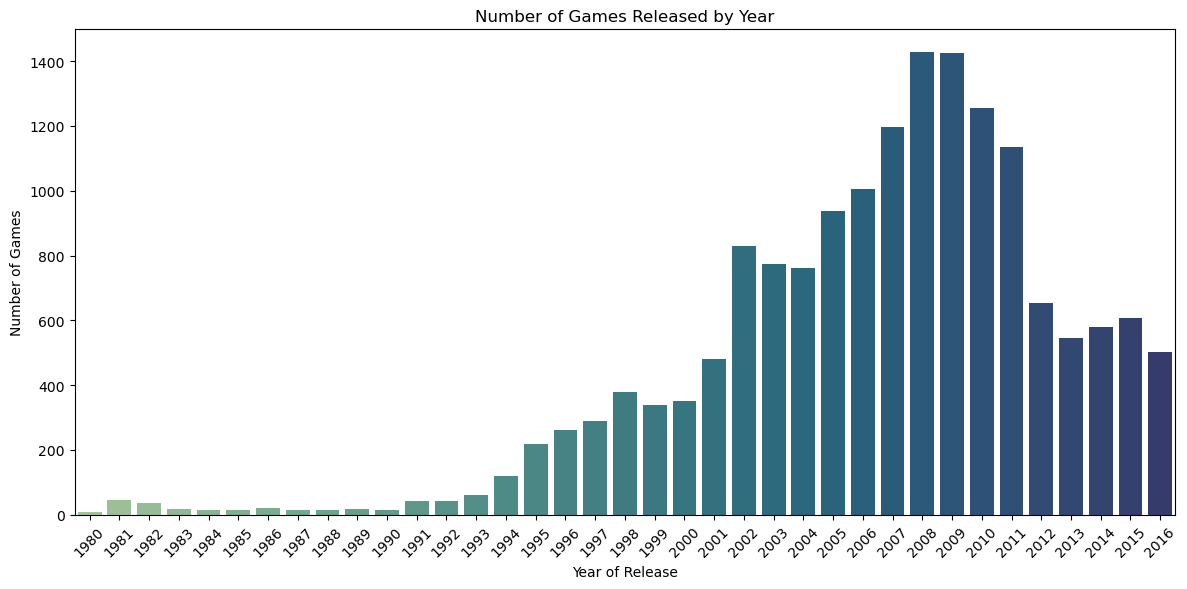

In [33]:
games_sales = df.groupby('year_of_release')['name'].count().reset_index()
games_sales.columns = ['year', 'games_released']
display(games_sales)

plt.figure(figsize=(12, 6))
sns.barplot(data=games_sales, x='year', y='games_released', palette='crest')
plt.title('Number of Games Released by Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The number of video games released each year steadily increased from the mid-1990s, peaking in **2008 and 2009** with over **1,400 games released per year**. This period represents the height of console diversity and a booming development market.

After 2011, there's a clear decline in the number of new games released each year — likely due to:
- Industry consolidation around fewer major platforms
- Rising development costs
- The shift toward digital/mobile games not fully reflected in this dataset

Earlier periods (1980–1994) show very few releases and are likely **incomplete or not representative** of the modern game market. For this reason, we will focus the rest of the analysis on data from **2010–2016**, which contains sufficient volume and reflects current industry patterns.

In [34]:
# Adding a column, 'total_sales', to the dataframe for total sales in each region
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/4161622478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_sales_by_year, x='year_of_release', y='total_sales', palette='Blues_d')


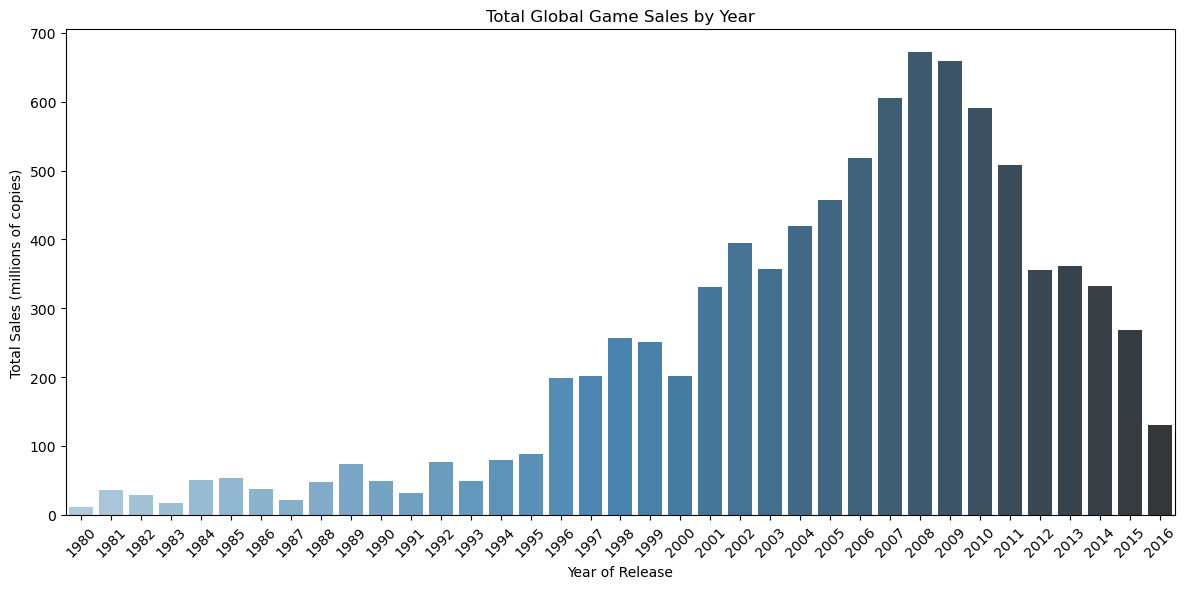

In [35]:
# 💰 Total global sales (in millions) per year
df_sales = df.dropna(subset=['year_of_release', 'total_sales'])

total_sales_by_year = df_sales.groupby('year_of_release')['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=total_sales_by_year, x='year_of_release', y='total_sales', palette='Blues_d')
plt.title('Total Global Game Sales by Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions of copies)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Sales by Platform 
Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

### Total Sales by Top Platforms (All Time)

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1556021471.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_platforms, x='platform', y='total_sales', palette='viridis')


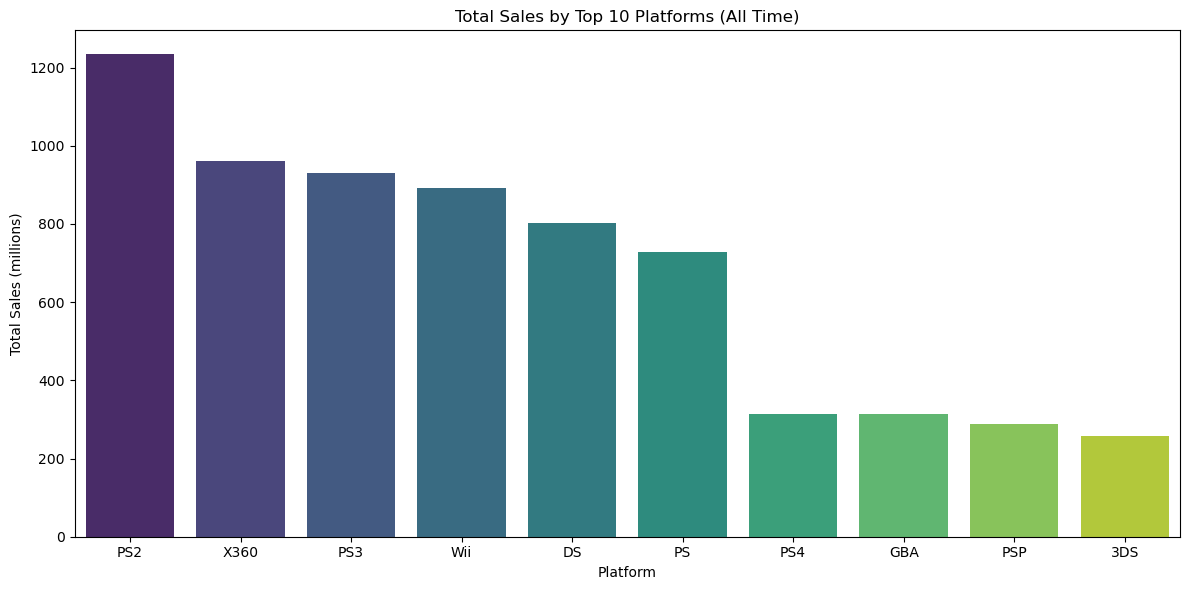

In [36]:
platform_sales = df.groupby('platform')['total_sales'].sum().reset_index()
platform_sales = platform_sales.sort_values(by='total_sales', ascending=False)

# Plot top 10 platforms
top_10_platforms = platform_sales.head(10)
display(top_10_platforms)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_platforms, x='platform', y='total_sales', palette='viridis')
plt.title('Total Sales by Top 10 Platforms (All Time)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()

### Yearly Sales for Top Platforms

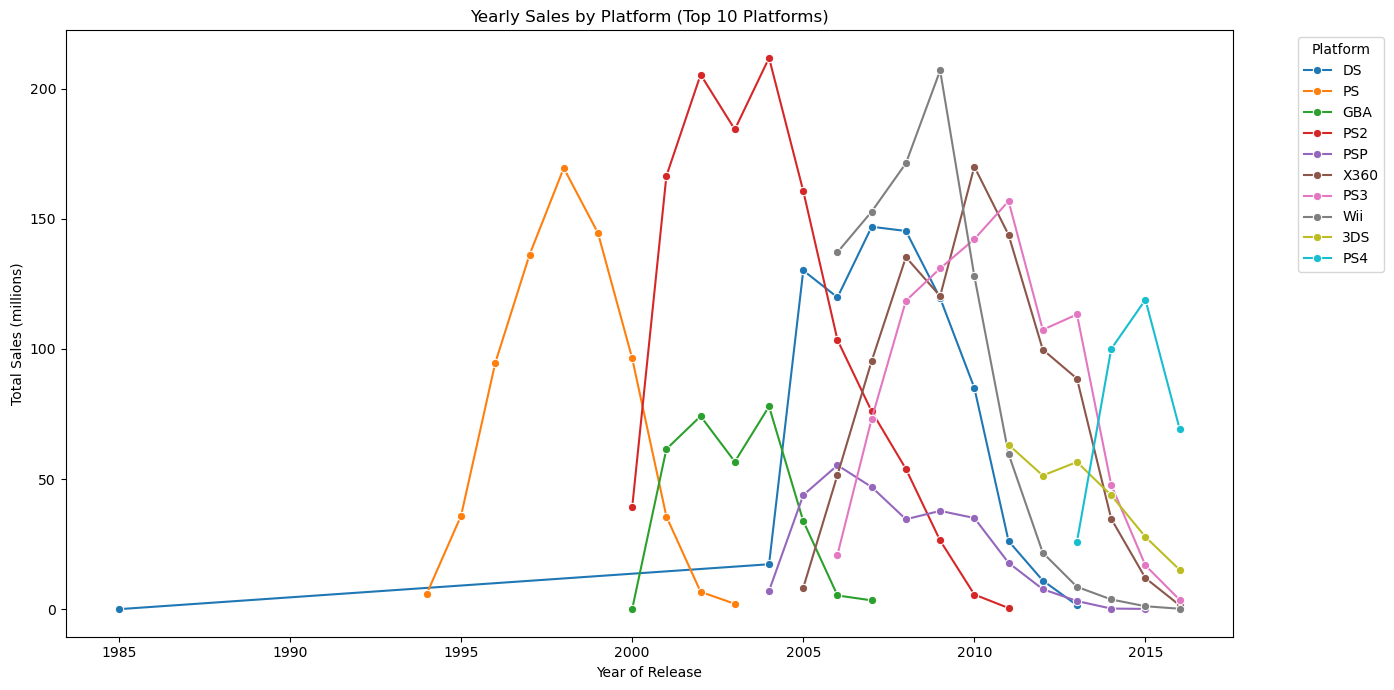

In [37]:
# Filter the main DataFrame to include only the top 10 platforms
filtered_df = df[df['platform'].isin(top_10_platforms['platform'])]

# Group by year and platform to get yearly sales totals
platform_trends = (
    filtered_df.groupby(['year_of_release', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

# Plot line chart
plt.figure(figsize=(14, 7))
sns.lineplot(data=platform_trends, x='year_of_release', y='total_sales', hue='platform', marker="o")
plt.title('Yearly Sales by Platform (Top 10 Platforms)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Most platforms follow a clear product lifecycle pattern: a rise in sales following launch, a peak in popularity, and a gradual decline as newer consoles enter the market.

Key observations:

- PS2, Wii, and DS show strong early performance but faded before 2013.

- X360 and PS3 peaked around 2010 and declined steadily.

- PS4 and 3DS were still gaining or maintaining momentum by 2016, suggesting they will remain active in 2017.

These trends help identify which platforms are still commercially relevant and which should be excluded from future sales forecasts. We'll use this insight to focus our analysis on currently active platforms starting in 2013.

### Identify Platforms That Used to Be Popular but Now Have Zero Sales

In [38]:
# Define the year range
start_year = 2010
cutoff_year = 2013

# Platforms with sales before 2013
# Filter the data for the years 2010-2013
sales_before_2013 = df[(df['year_of_release'] >= start_year) & (df['year_of_release'] <= cutoff_year)]

# Identify platforms that had sales between 2010 and 2013
platforms_before_2013 = sales_before_2013[sales_before_2013['total_sales'] > 0]['platform']
platforms_before_2013 = platforms_before_2013.unique()

# Filter the data from 2013 onwards
recent_sales = df[df['year_of_release'] >= cutoff_year]
platforms_recent_sales = recent_sales[recent_sales['total_sales'] > 0]['platform'].unique()


# Platforms that had sales before 2013 but not after
popular_zero_sales_platforms = sorted(set(platforms_before_2013) - set(platforms_recent_sales))

print("Platforms that were once popular but now have zero sales:")
print(popular_zero_sales_platforms)

Platforms that were once popular but now have zero sales:
['PS2']


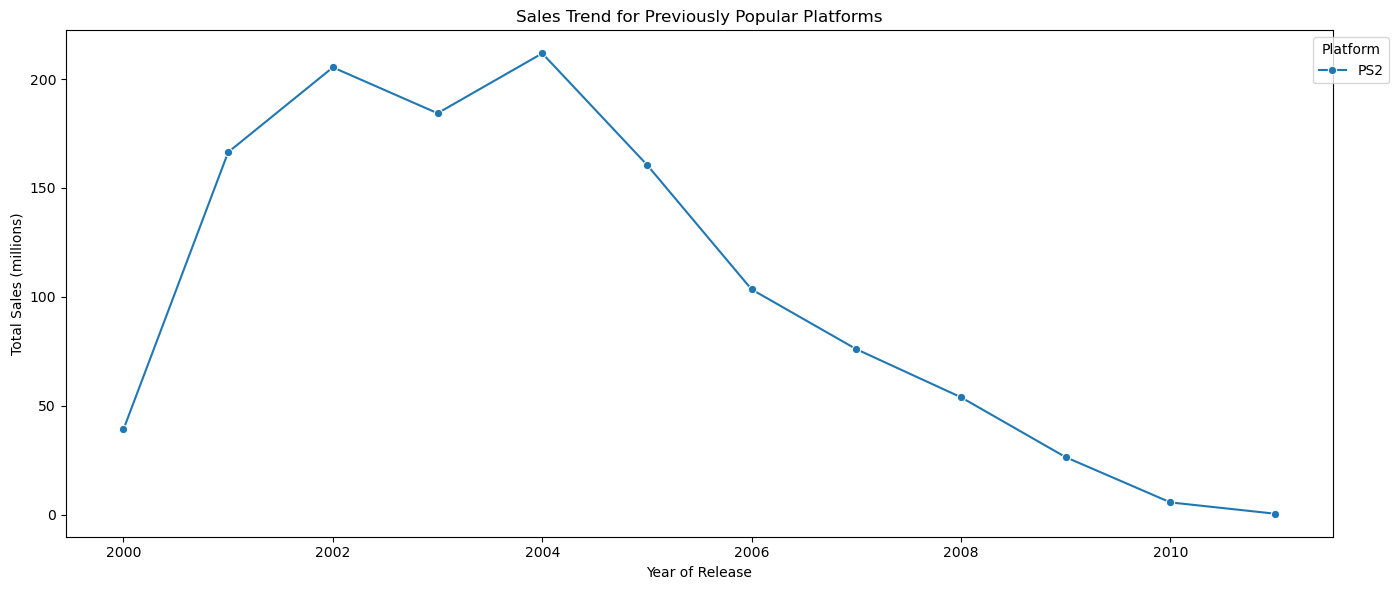

In [39]:
# Filter original data to only those "disappearing" platforms
legacy_df = df[df['platform'].isin(popular_zero_sales_platforms)]

# Group by year and platform
trend_df = legacy_df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

# Plot the decline
plt.figure(figsize=(14, 6))
sns.lineplot(data=trend_df, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Sales Trend for Previously Popular Platforms')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

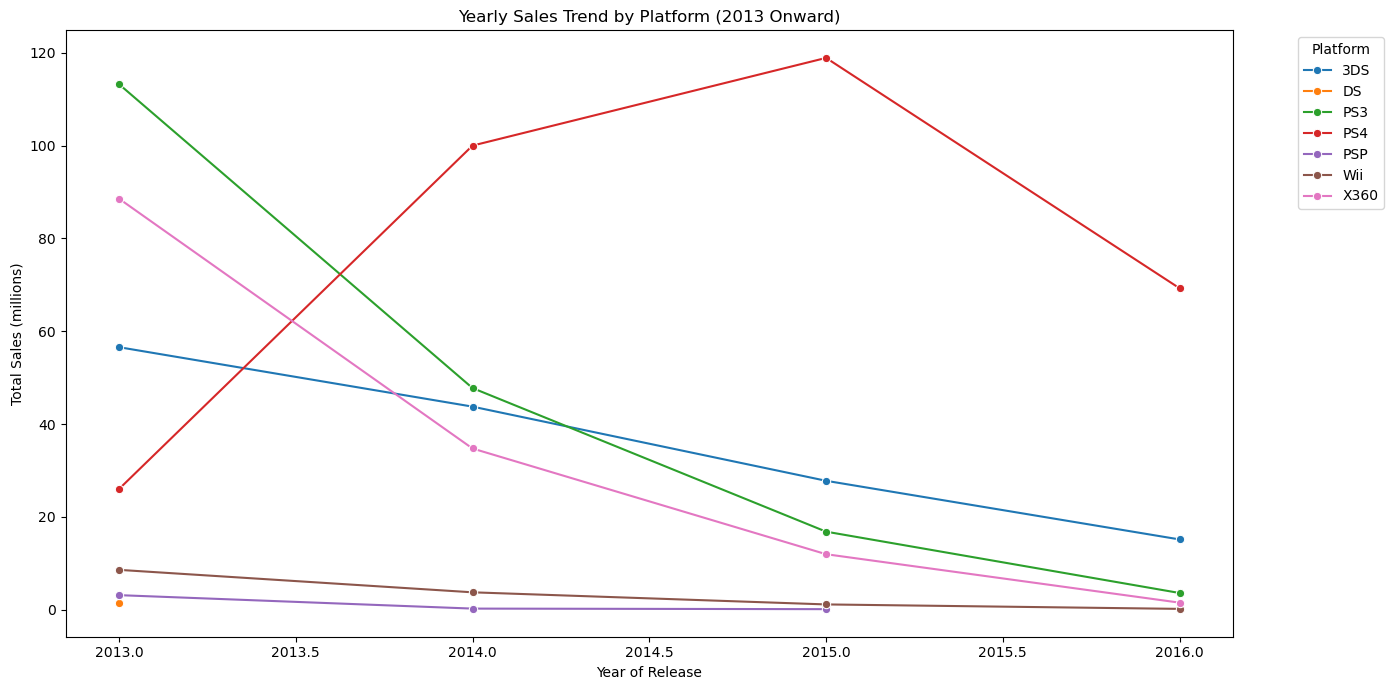

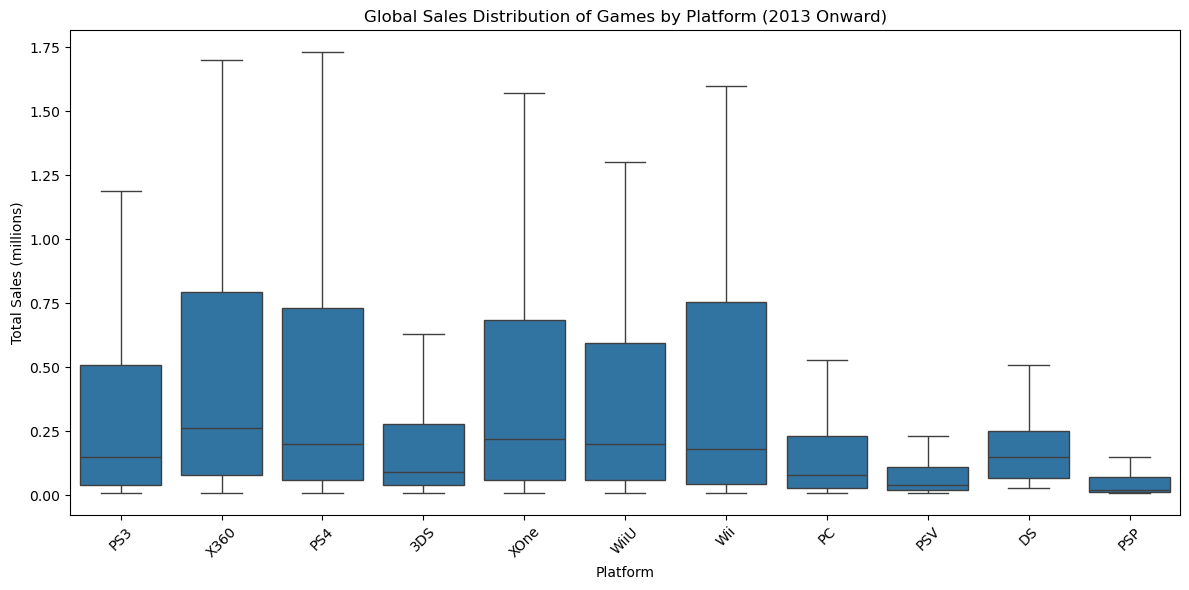

In [40]:
# Get recent data
recent_sales = df[df['year_of_release'] >= 2013].copy()

# Filter top platforms from earlier step
top_platform_names = top_10_platforms['platform'].tolist()
recent_top_platforms = recent_sales[recent_sales['platform'].isin(top_platform_names)]


# Aggregate yearly sales by platform
yearly_platform_sales = recent_top_platforms.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=yearly_platform_sales, x='year_of_release', y='total_sales', hue='platform', marker='o')

plt.title('Yearly Sales Trend by Platform (2013 Onward)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=recent_sales, x='platform', y='total_sales', showfliers=False)
plt.title('Global Sales Distribution of Games by Platform (2013 Onward)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Among the platforms still active after 2013:

- **PS4**, **X360**, and **XOne** have the most variable sales distributions, with some games reaching high global sales and a wide range of performance overall.
- **3DS**, **PSV**, **DS**, and **PSP** show lower sales overall and tighter interquartile ranges, suggesting fewer blockbuster hits.
- **PC** sales are more modest but steady, with a moderate spread and consistent median.

This analysis highlights which platforms are more likely to host top-selling games and which are more stable but lower-yield markets. These findings are important when selecting platforms for 2017 campaign focus.

## Platform Lifespans
How long does it take for new platforms to appear and old ones to fade?

In [41]:
def compute_platform_lifespans(data):
    """Compute lifespan and appearance gap for each game platform."""
    lifespans = (
        data.groupby('platform')['year_of_release']
        .agg(['min', 'max'])
        .reset_index()
        .rename(columns={'min': 'first_year', 'max': 'last_year'})
    )
    lifespans['lifespan'] = lifespans['last_year'] - lifespans['first_year']
    lifespans = lifespans.sort_values('first_year')
    lifespans['years_between_new_platforms'] = lifespans['first_year'].diff()
    
    avg_lifespan = lifespans['lifespan'].mean()
    avg_new_platform_gap = lifespans['years_between_new_platforms'].mean()
    
    return lifespans, avg_lifespan, avg_new_platform_gap

In [42]:
platform_lifespans, avg_lifespan, avg_first_appearance = compute_platform_lifespans(df)

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/57223006.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


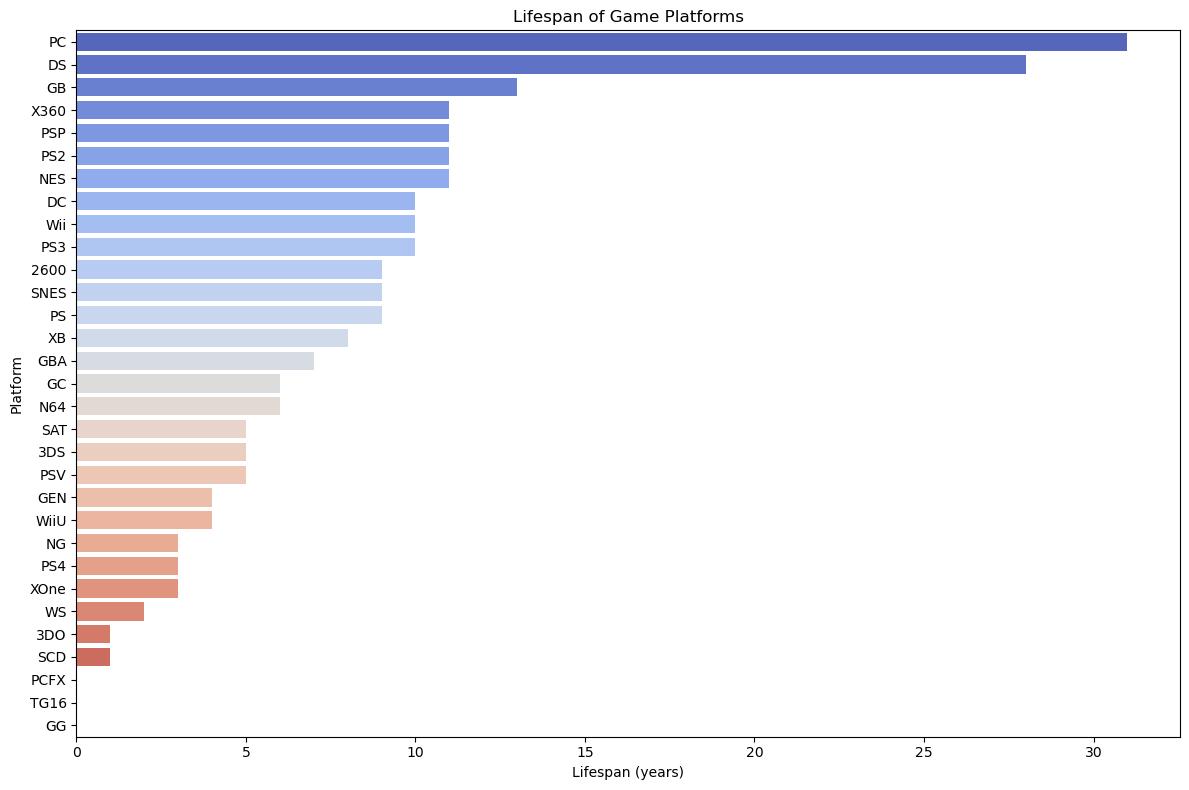

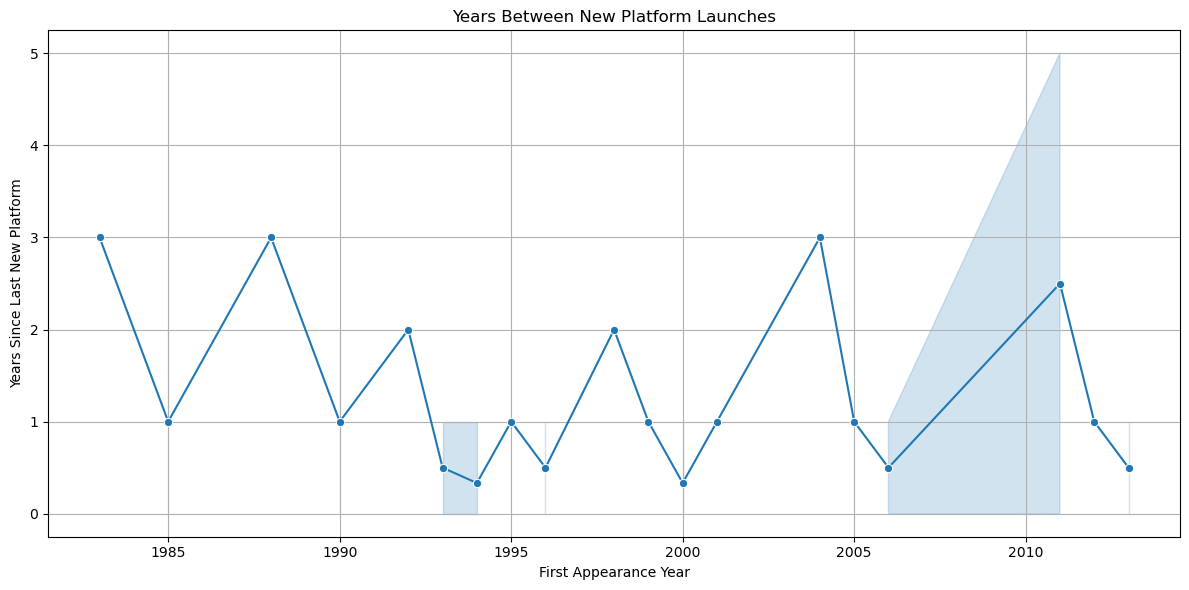

In [43]:
# Plot the lifespan of each platform
plt.figure(figsize=(12, 8))
sns.barplot(
    data=platform_lifespans.sort_values('lifespan', ascending=False),
    y='platform', x='lifespan', palette='coolwarm'
)
plt.title('Lifespan of Game Platforms')
plt.xlabel('Lifespan (years)')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

# Plot years between new platforms appearing
plt.figure(figsize=(12, 6))
sns.lineplot(data=platform_lifespans, x='first_year', y='years_between_new_platforms', marker='o')

plt.title('Years Between New Platform Launches')
plt.xlabel('First Appearance Year')
plt.ylabel('Years Since Last New Platform')
plt.grid(True)
plt.tight_layout()
plt.show()

In [44]:
# How long for new platforms to appear? Calculate the time difference between the first appearances of platforms
platform_lifespans = platform_lifespans.sort_values('first_year')
platform_lifespans['first_appearance'] = platform_lifespans['first_year'].diff()

# Calculate the average time between platform appearances and average platform lifespan
avg_first_appearance = platform_lifespans['first_appearance'].mean()

# Calculate the average platform lifespan
avg_lifespan = platform_lifespans['lifespan'].mean()

# Check our work
display(platform_lifespans.head(31), 'When does a new platform appear?', avg_first_appearance, 'Average platform lifespan:', avg_lifespan)

,platform,first_year,last_year,lifespan,years_between_new_platforms,first_appearance
0,2600,1980,1989,9,NaN,NaN
11,NES,1983,1994,11,3.0,3.0
4,DS,1985,2013,28,2.0,2.0
13,PC,1985,2016,31,0.0,0.0
5,GB,1988,2001,13,3.0,3.0
23,SNES,1990,1999,9,2.0,2.0
8,GEN,1990,1994,4,0.0,0.0
9,GG,1992,1992,0,2.0,2.0
22,SCD,1993,1994,1,1.0,1.0
12,NG,1993,1996,3,0.0,0.0


'When does a new platform appear?'

1.1

'Average platform lifespan:'

7.612903225806452

The video game industry consistently introduces new platforms, with a **new platform launching roughly every 1.1 years** on average. Once released, a platform typically remains active for about **7.6 years**.

Notable examples:
- **Atari 2600** launched in 1980 and lasted until 1989 (9 years)
- **NES** launched in 1983 and was supported until 1994 (11 years)

Understanding these platform lifecycles helps anticipate when **current-gen consoles** may phase out — which is critical for **forecasting future sales** and targeting emerging platforms in marketing strategies.

## Choosing a Forecast Period

In [45]:
# Use 2013 as cutoff for recent data
df_recent = df[df['year_of_release'] >= 2013].copy()

Based on platform sales trends and lifecycle analysis, the year **2013** marks a clear generational shift in the gaming industry:

- Older platforms like **PS2**, **PSP**, and **DS** had no sales after this point.
- Newer platforms such as **PS4**, **XOne**, and **3DS** rose in popularity beginning in 2013.
- The average platform lifespan (~7.6 years) supports the idea that platforms introduced after 2010 will still be active in 2017.

Therefore, we will use **data from 2013 to 2016** to build our forecast for 2017.

## Analyze Platform Trends (2013–2016)
Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

### Platform sales

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1864118438.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recent_platform_sales.index, y=recent_platform_sales.values, palette='viridis')


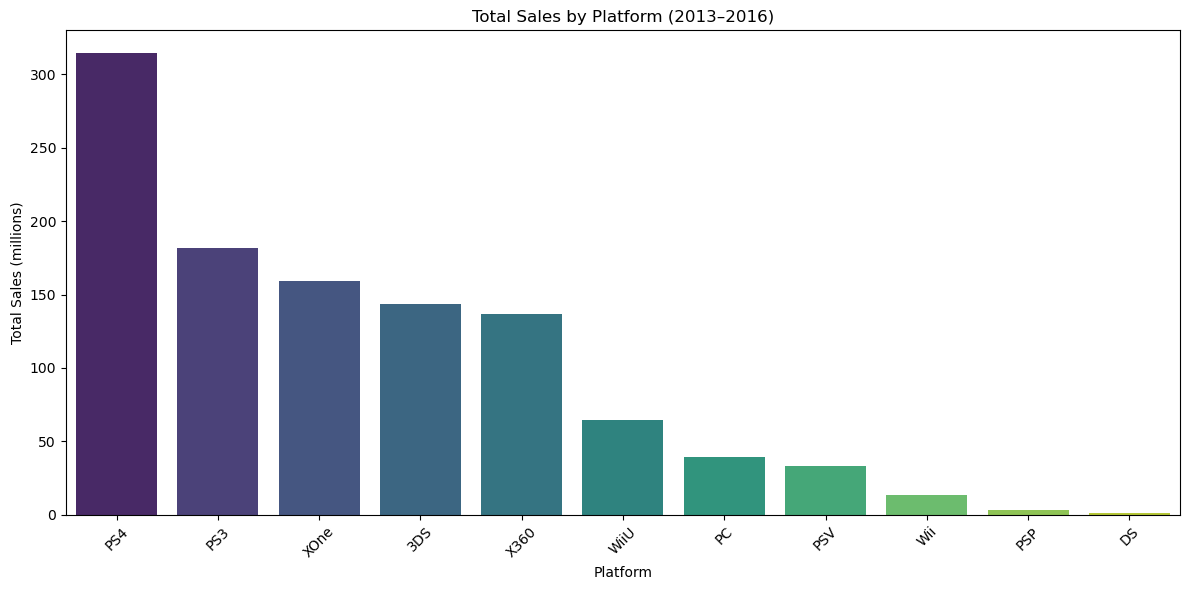

In [46]:
recent_platform_sales = (
    df_recent.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

display(recent_platform_sales)

plt.figure(figsize=(12, 6))
sns.barplot(x=recent_platform_sales.index, y=recent_platform_sales.values, palette='viridis')
plt.title('Total Sales by Platform (2013–2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Identify Growth/Decline Trend

In [47]:
# Calculate yearly sales
platform_yearly_sales = (
    df_recent.groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
    .sort_values(['platform', 'year_of_release'])
)

# Calculate sales change per platform
platform_yearly_sales['sales_change'] = platform_yearly_sales.groupby('platform')['total_sales'].diff()

# Determine trend direction
platform_yearly_sales['trend'] = platform_yearly_sales['sales_change'].apply(
    lambda x: 'growing' if x > 0 else ('shrinking' if x < 0 else 'no change')
)

display(platform_yearly_sales.head(12))  # preview of trend info

,platform,year_of_release,total_sales,sales_change,trend
0,3DS,2013,56.57,NaN,no change
1,3DS,2014,43.76,-12.81,shrinking
2,3DS,2015,27.78,-15.98,shrinking
3,3DS,2016,15.14,-12.64,shrinking
4,DS,2013,1.54,NaN,no change
5,PC,2013,12.38,NaN,no change
6,PC,2014,13.28,0.90,growing
7,PC,2015,8.52,-4.76,shrinking
8,PC,2016,5.25,-3.27,shrinking
9,PS3,2013,113.25,NaN,no change


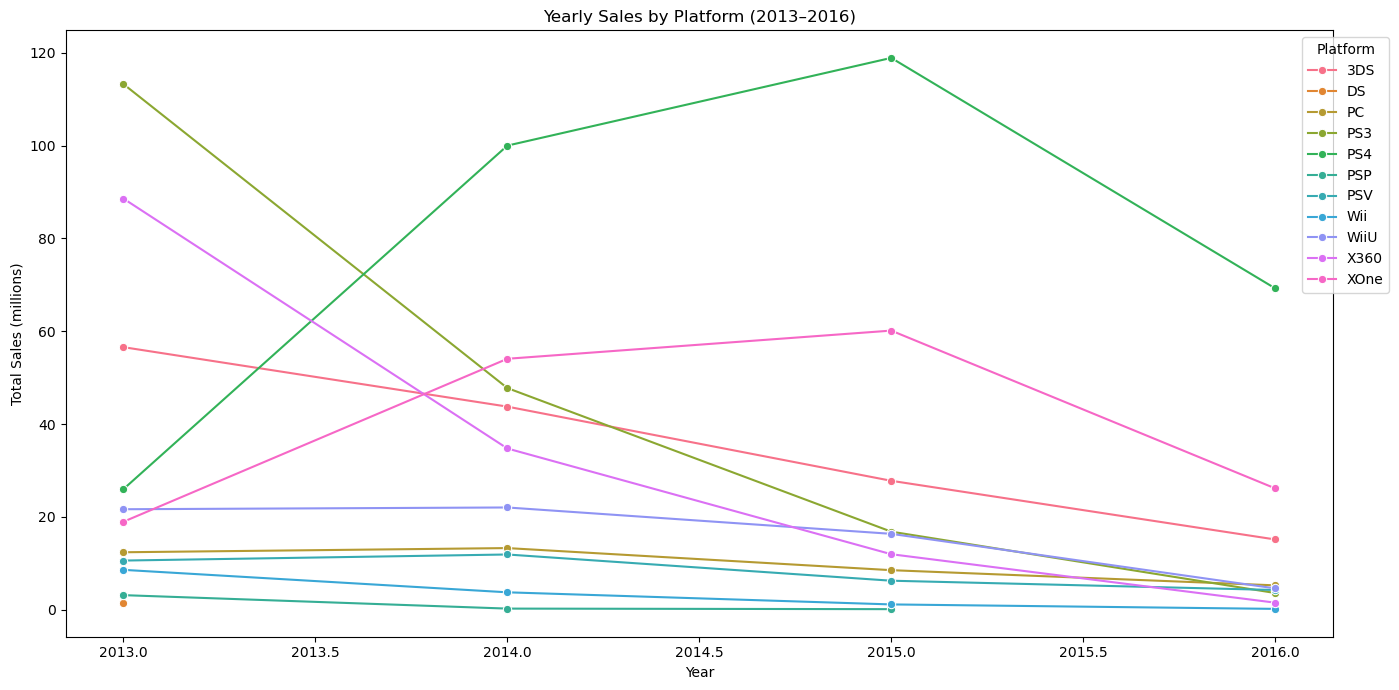

In [48]:
# Plot it
plt.figure(figsize=(14, 7))
sns.lineplot(data=platform_yearly_sales, x='year_of_release', y='total_sales', hue='platform', marker='o')
plt.title('Yearly Sales by Platform (2013–2016)')
plt.xlabel('Year')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

Based on total sales and year-over-year performance:

- **PS4**, **XOne**, and **3DS** are leading platforms in terms of total sales.
- **PS4** and **XOne** show upward or sustained sales trends, indicating ongoing popularity.
- **PS3**, **Wii**, and **DS** show declining sales — confirming their phase-out.
- Platforms like **PC** and **WiiU** have moderate sales but lower variability, suggesting niche or stable markets.

These insights will guide platform selection for 2017 forecasts, focusing on high-growth and high-sales systems like **PS4** and **XOne**.

## Which Platforms Are Profitable? What Drives Sales?

- Which platforms have the most consistent or high sales?
- How do user and critic reviews affect sales?

### Sales Distribution by Platform

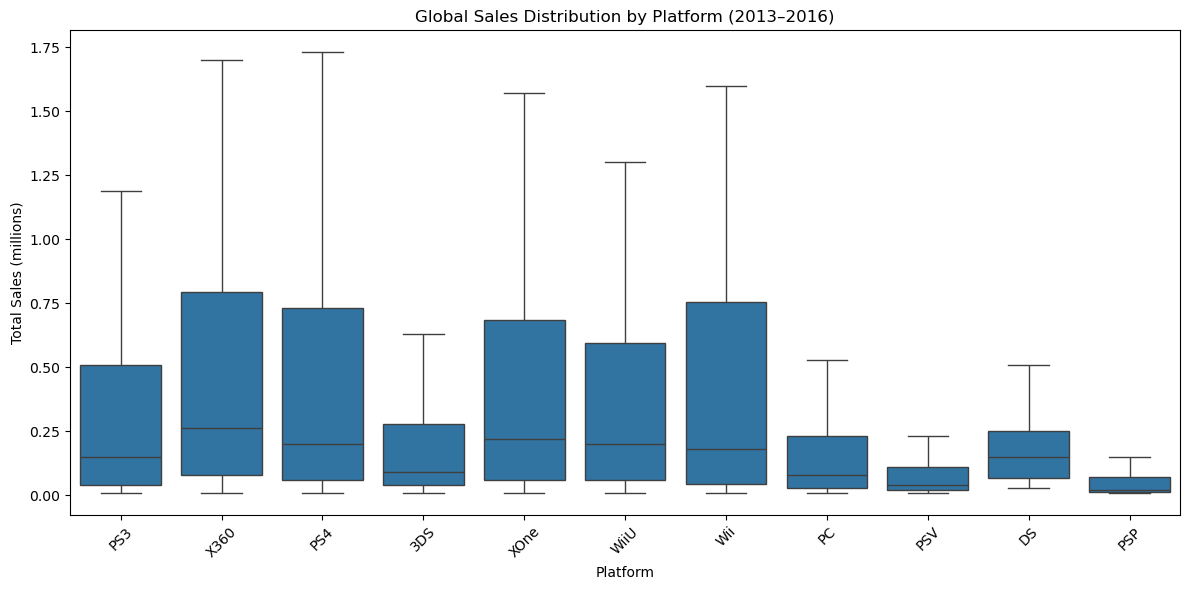

In [49]:
# Plot global sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_recent, x='platform', y='total_sales', showfliers=False)
plt.title('Global Sales Distribution by Platform (2013–2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **PS4**, **XOne**, and **X360** show wide distribution and high variability in sales.
- These platforms also have **higher medians**, indicating a higher chance of commercial success.
- **3DS**, **WiiU**, and **PSV** show lower median sales and narrower ranges.

This suggests **PS4 and XOne** are not only popular but also host more top-selling games, making them strong candidates for profitable releases in 2017.

### How Reviews Affect Sales (PS4)

In [50]:
# Filter for PS4
df_ps4 = df_recent[df_recent['platform'] == 'PS4']

# Drop missing scores
df_ps4 = df_ps4.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Correlation
correlation_matrix = df_ps4[['critic_score', 'user_score', 'total_sales']].corr()
display(correlation_matrix)

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.405895
user_score,0.557654,1.000000,-0.033625
total_sales,0.405895,-0.033625,1.000000


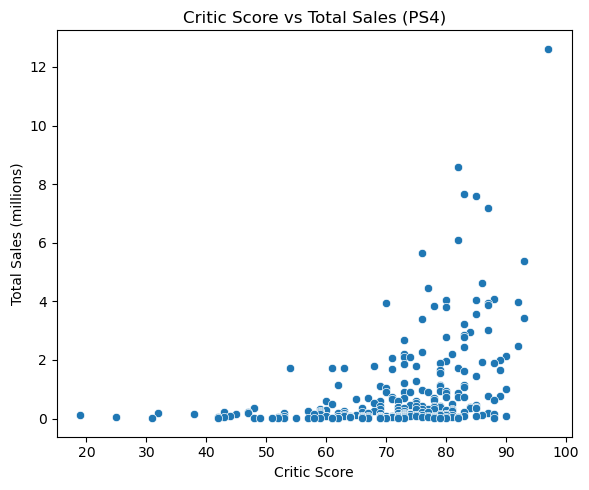

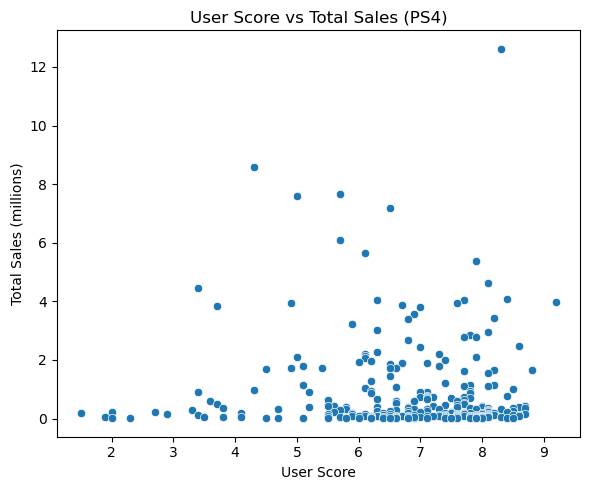

In [51]:
# Critic Score vs Total Sales
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_ps4, x='critic_score', y='total_sales')
plt.title('Critic Score vs Total Sales (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()

# User Score vs Total Sales
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df_ps4, x='user_score', y='total_sales')
plt.title('User Score vs Total Sales (PS4)')
plt.xlabel('User Score')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()

- **Critic scores** show a moderate positive correlation with total sales on PS4 — highly rated games tend to sell more.
- **User scores**, however, have a much weaker correlation — indicating that user reviews may have less commercial influence.

This suggests that for PS4, **professional reviews are a stronger predictor** of success.

## Comparing Cross-Platform Game Sales

In [52]:
# Filter for recent games
recent_games = df[df['year_of_release'] >= 2013].copy()


In [53]:
game_platform_counts = recent_games.groupby('name')['platform'].nunique()
multi_platform_games = game_platform_counts[game_platform_counts >= 4].index

multi_platform_df = recent_games[recent_games['name'].isin(multi_platform_games)]

In [54]:
# High sales games 
high_sales_df = multi_platform_df[multi_platform_df['total_sales'] > 3]
high_sales_df['name'].value_counts()

name
Grand Theft Auto V                     4
Call of Duty Advanced Warfare          4
Call of Duty Ghosts                    3
Minecraft                              3
Battlefield 4                          3
FIFA 14                                3
Destiny                                2
FIFA 16                                2
FIFA 15                                2
Assassins Creed IV Black Flag          2
Call of Duty Black Ops 3               2
Watch Dogs                             1
Far Cry 4                              1
NBA 2K16                               1
FIFA 17                                1
Just Dance 2014                        1
Metal Gear Solid V The Phantom Pain    1
Madden NFL 16                          1
Name: count, dtype: Int64

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/3807389551.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=game_df, x='platform', y='total_sales', palette='magma')


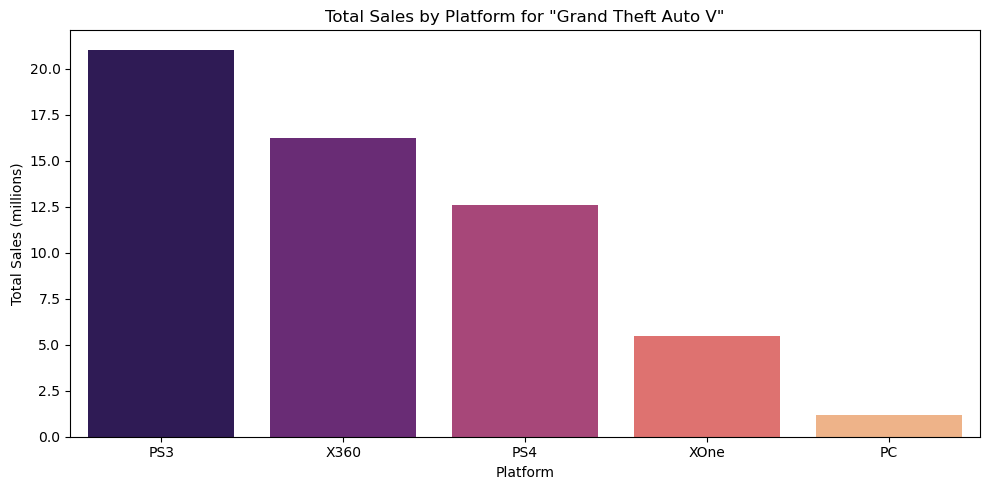

In [55]:
game_name = 'Grand Theft Auto V'  # or another from above
game_df = df[df['name'] == game_name]

plt.figure(figsize=(10, 5))
sns.barplot(data=game_df, x='platform', y='total_sales', palette='magma')
plt.title(f'Total Sales by Platform for "{game_name}"')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()

For popular games like **Grand Theft Auto V**, total sales differ significantly by platform. In this case:

- **PS3** and **X360** captured early sales momentum.
- **PS4** and **XOne** picked up later as newer consoles gained market share.
- PC sales were lower but steady.

This analysis shows how release timing and platform popularity influence game performance — important when forecasting sales across systems.


## General Distribution of Games by Genre
- What are the most profitable genres?
- Can we generalize about genres with high and low sales?
- Which genres are most consistent or volatile?

In [56]:
genre_sales = (
    df_recent
    .groupby('genre')['total_sales']
    .agg(['mean', 'median', 'sum', 'count'])
    .sort_values(by='sum', ascending=False)
)

display(genre_sales)

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/62628280.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('genre')['total_sales']


,mean,median,sum,count
genre,,,,
Action,0.420196,0.110,321.87,766
Shooter,1.245882,0.450,232.98,187
Sports,0.703972,0.240,150.65,214
Role-Playing,0.499623,0.125,145.89,292
Misc,0.405290,0.100,62.82,155
Platform,0.576081,0.225,42.63,74
Racing,0.469294,0.120,39.89,85
Fighting,0.441375,0.125,35.31,80
Adventure,0.096490,0.030,23.64,245


/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/663096316.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_sales.reset_index(), x='genre', y='sum', palette='crest')


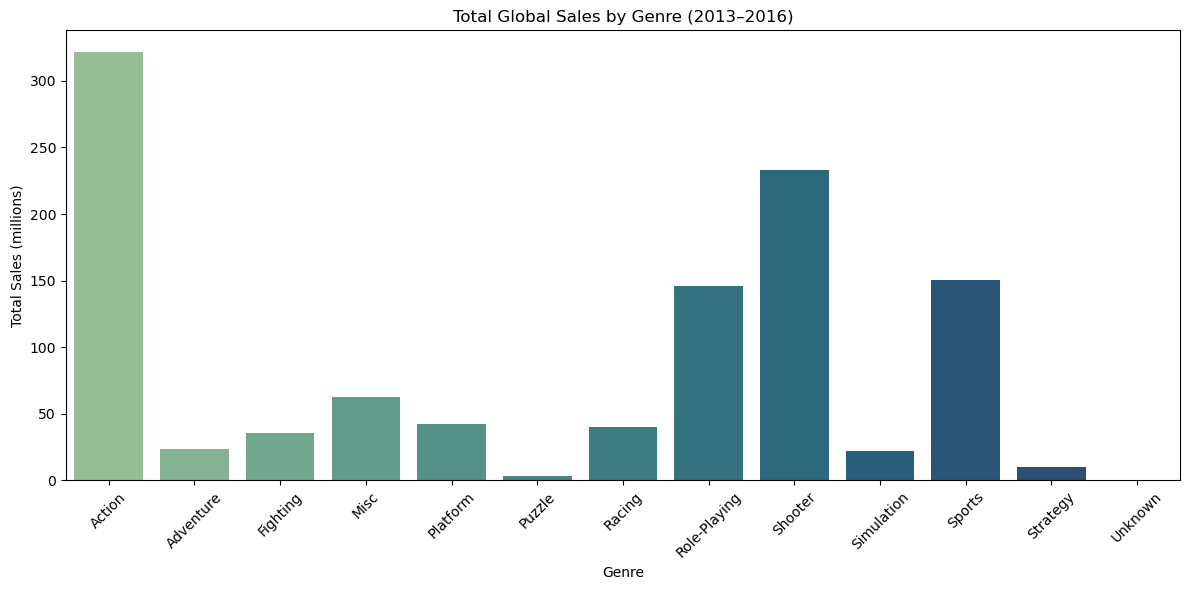

In [57]:
# Visualize the distribution of total sales by genre
# Bar chart of total sales by genre
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales.reset_index(), x='genre', y='sum', palette='crest')
plt.title('Total Global Sales by Genre (2013–2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

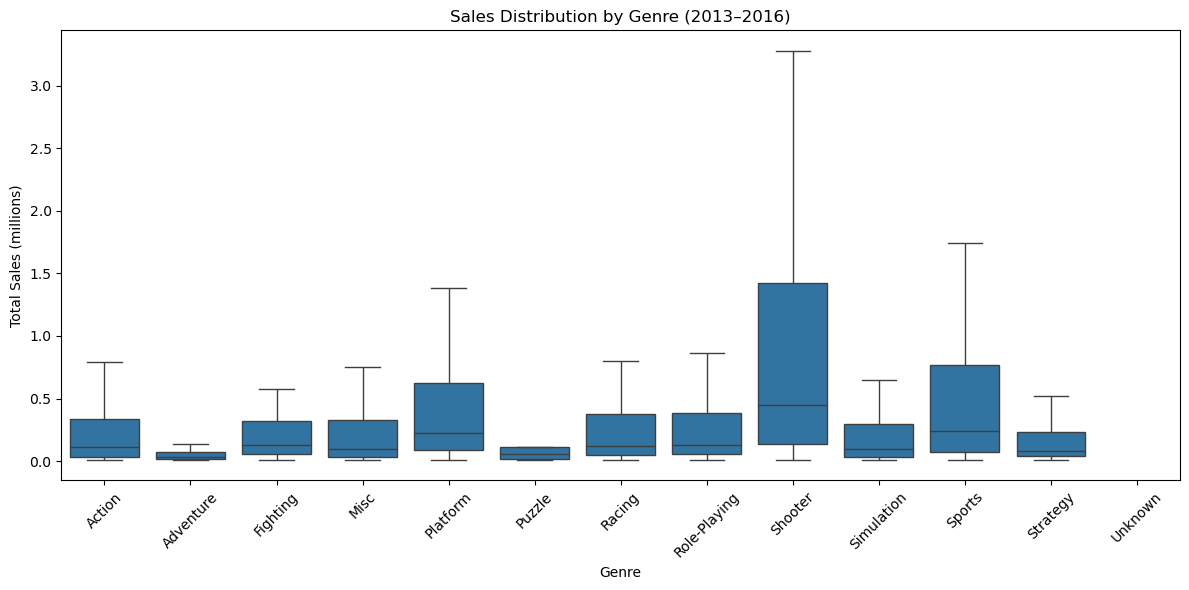

In [58]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_recent, x='genre', y='total_sales', showfliers=False)
plt.title('Sales Distribution by Genre (2013–2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- **Action**, **Shooter**, and **Sports** genres led in total sales.
- **Platform** and **Racing** games had high median and mean sales despite fewer releases.
- **Puzzle**, **Strategy**, and **Adventure** genres consistently had lower total and average sales.

We can generalize that:
- **High-performing genres** often include blockbuster franchises and appeal to broad audiences.
- **Low-performing genres** may have niche appeal or fewer high-profile releases.
- The **Action** genre dominates in both volume and performance, making it a reliable target for forecasting 2017 trends.

# Regional Sales Patterns: NA, EU, JP

Goal: Build user profiles for each region by identifying:
- The top platforms
- The most popular genres
- The impact of ESRB ratings (if available)
- Key differences between regions

In [59]:
# Filter for recent years
df_recent = df[df['year_of_release'] >= 2013].copy()

In [60]:
# Define the region datasets
na = df_recent[df_recent['na_sales'] > 0]
eu = df_recent[df_recent['eu_sales'] > 0]
jp = df_recent[df_recent['jp_sales'] > 0]

## Top Platforms by Region

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1045743333.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_platform_sales.index, y=na_platform_sales.values, palette='Blues')


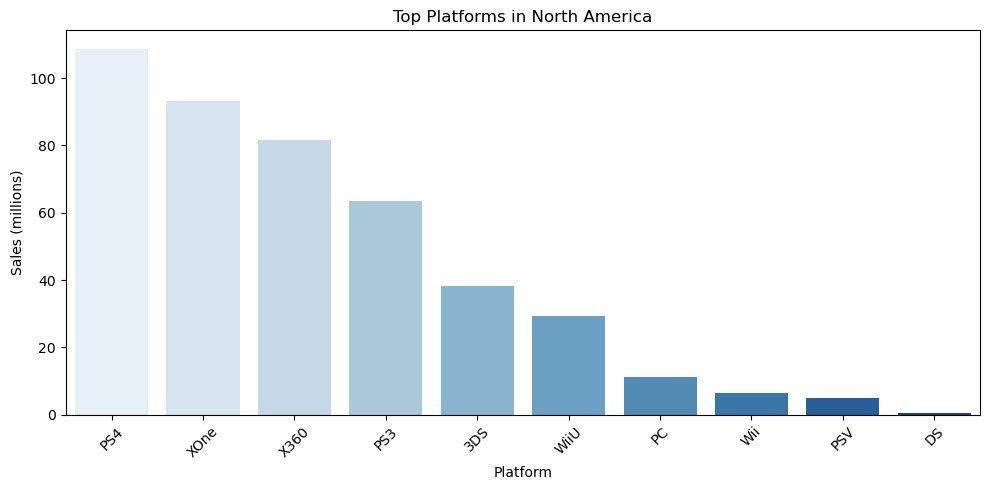

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1045743333.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jp_platform_sales.index, y=jp_platform_sales.values, palette='Purples')


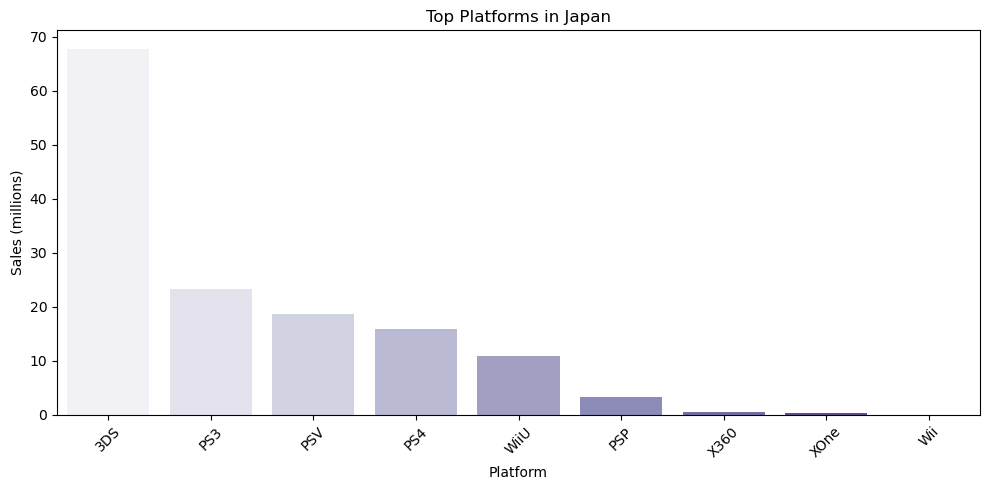

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1045743333.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eu_platform_sales.index, y=eu_platform_sales.values, palette='Reds')


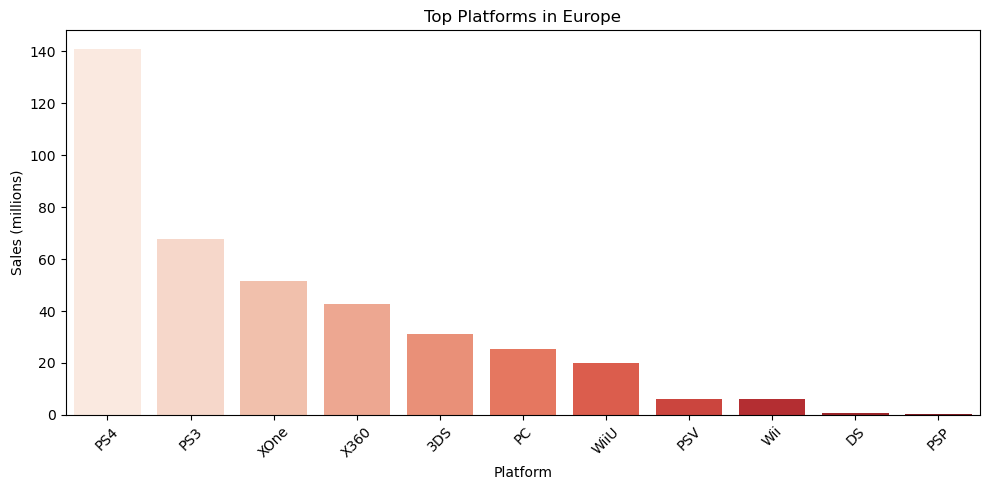

In [61]:
# NA
na_platform_sales = na.groupby('platform')['na_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=na_platform_sales.index, y=na_platform_sales.values, palette='Blues')
plt.title('Top Platforms in North America')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# JP 
jp_platform_sales = jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=jp_platform_sales.index, y=jp_platform_sales.values, palette='Purples')
plt.title('Top Platforms in Japan')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# EU
eu_platform_sales = eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=eu_platform_sales.index, y=eu_platform_sales.values, palette='Reds')
plt.title('Top Platforms in Europe')
plt.xlabel('Platform')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Top Genres by Region

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1990759605.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  na_genre_sales = na.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1990759605.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_genre_sales.index, y=na_genre_sales.values, palette='crest')


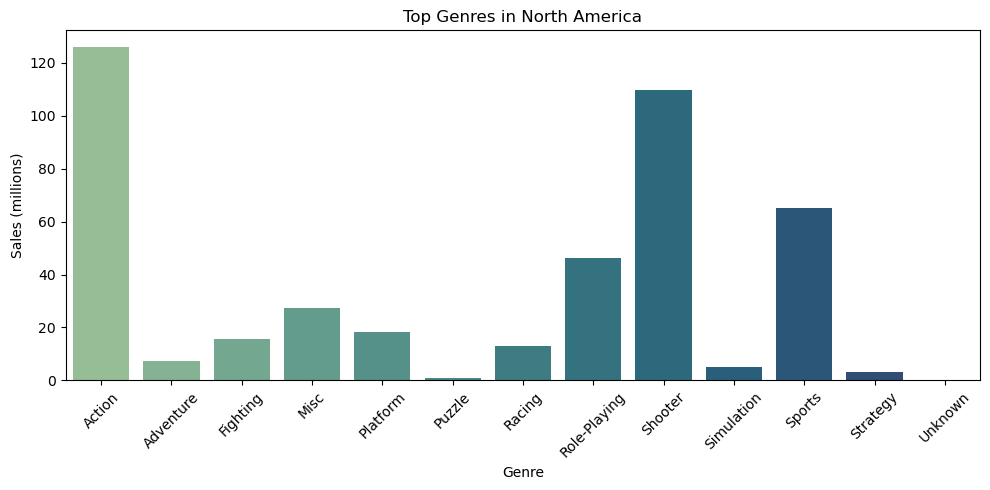

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1990759605.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jp_genre_sales = jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1990759605.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jp_genre_sales.index, y=jp_genre_sales.values, palette='rocket')


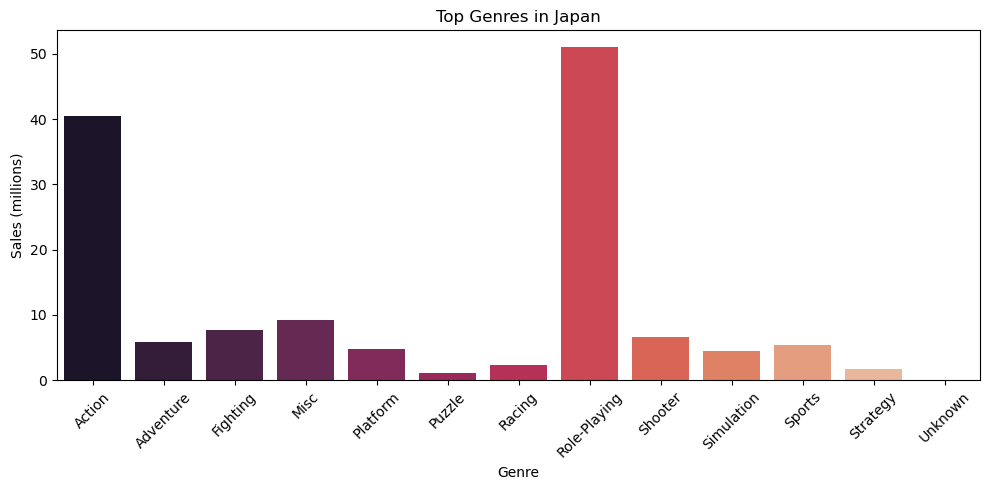

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1990759605.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eu_genre_sales = eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/1990759605.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eu_genre_sales.index, y=eu_genre_sales.values, palette='mako')


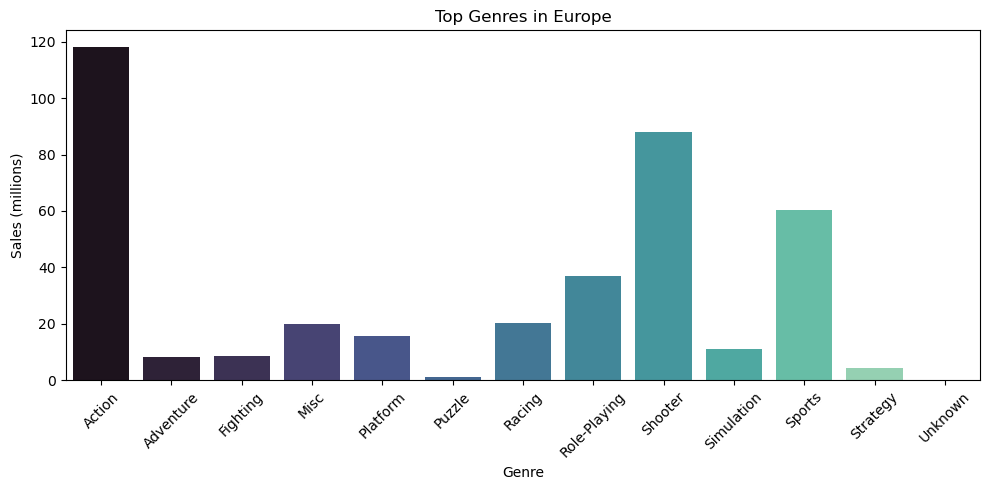

In [62]:
# NA
na_genre_sales = na.groupby('genre')['na_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=na_genre_sales.index, y=na_genre_sales.values, palette='crest')
plt.title('Top Genres in North America')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# JP
jp_genre_sales = jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=jp_genre_sales.index, y=jp_genre_sales.values, palette='rocket')
plt.title('Top Genres in Japan')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# EU
eu_genre_sales = eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=eu_genre_sales.index, y=eu_genre_sales.values, palette='mako')
plt.title('Top Genres in Europe')
plt.xlabel('Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ESRB Ratings by Region 

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/251278647.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  na_rating_sales = na.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/251278647.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=na_rating_sales.index, y=na_rating_sales.values, palette='Set2')


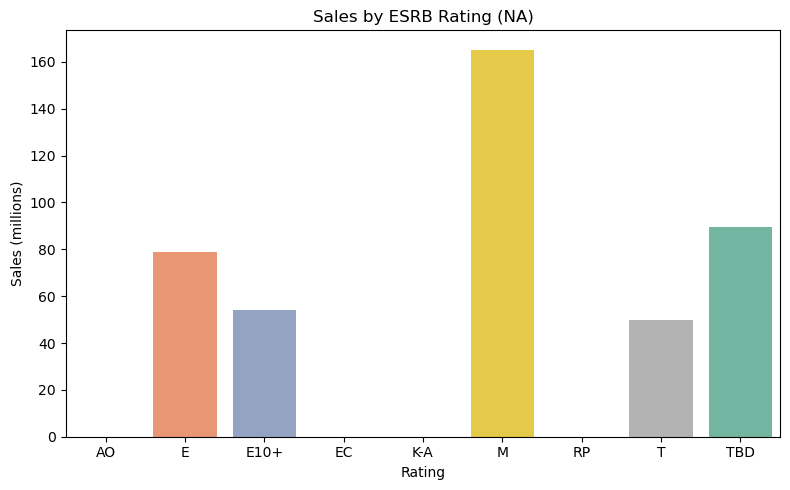

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/251278647.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jp_rating_sales = jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/251278647.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=jp_rating_sales.index, y=jp_rating_sales.values, palette='Set3')


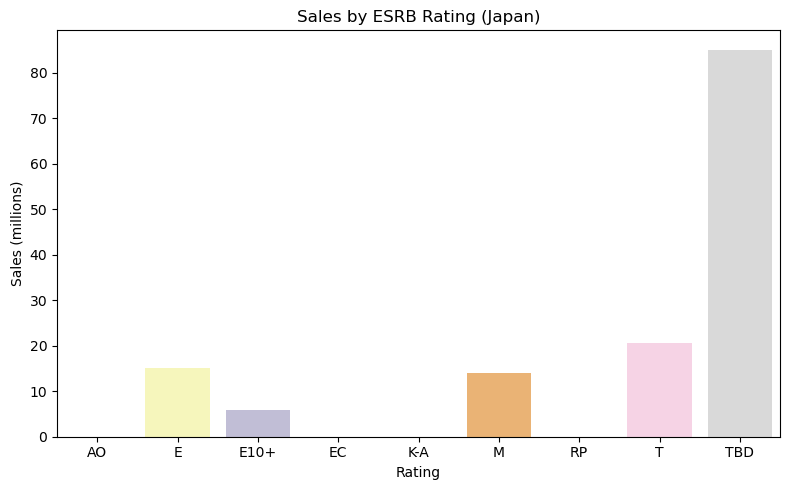

/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/251278647.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  eu_rating_sales = eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/251278647.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=eu_rating_sales.index, y=eu_rating_sales.values, palette='husl')


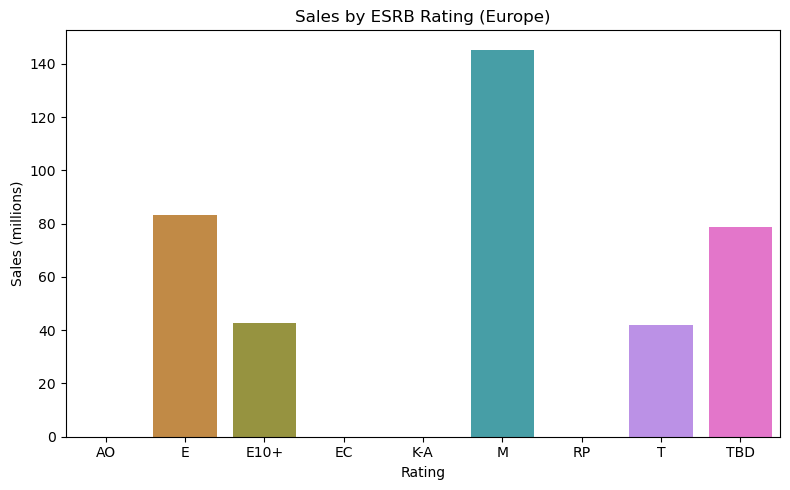

In [63]:
# NA
na_rating_sales = na.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=na_rating_sales.index, y=na_rating_sales.values, palette='Set2')
plt.title('Sales by ESRB Rating (NA)')
plt.xlabel('Rating')
plt.ylabel('Sales (millions)')
plt.tight_layout()
plt.show()

# JP
jp_rating_sales = jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=jp_rating_sales.index, y=jp_rating_sales.values, palette='Set3')
plt.title('Sales by ESRB Rating (Japan)')
plt.xlabel('Rating')
plt.ylabel('Sales (millions)')
plt.tight_layout()
plt.show()

# EU
eu_rating_sales = eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=eu_rating_sales.index, y=eu_rating_sales.values, palette='husl')
plt.title('Sales by ESRB Rating (Europe)')
plt.xlabel('Rating')
plt.ylabel('Sales (millions)')
plt.tight_layout()
plt.show()

### 📌 North America User Profile (2013–2016)

- **Top Platforms**: X360, PS4, and XOne lead in total sales.
- **Top Genres**: Shooter and Action dominate NA preferences.
- **ESRB Ratings**: Games rated **M** and **E** perform best.

North American gamers favor competitive and high-action titles, often console-based with mature or family-friendly ratings.


### 📌 Japan User Profile (2013–2016)

- **Top Platforms**: 3DS, PS3, and PSV lead in total sales.
- **Top Genres**: Action and Role-Playing dominate JP preferences.
- **ESRB Ratings**: Games rated **TBD** perform best.

Japanese gamers favor **portable platforms** and **immersive gameplay**. When building a strategy for this region, prioritize **RPGs** and **Action titles** on **handheld or cross-platform consoles**.
Local cultural preferences and unclassified games skew the ESRB distribution, so other rating systems may be more relevant here.

### 📌 European User Profile (2013–2016)

- **Top Platforms**: PS4, PS3, and Xbox One lead in total sales.
- **Top Genres**: Action and Shooter games dominate EU preferences.
- **ESRB Ratings**: Games rated **Mature** perform best.

European gamers fast-paced action titles that are console-based with mature ratings.

# Hypothesis Testing



## Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same
- H₀: μ₁ = μ₂ (Average user ratings are the same)
- H₁: μ₁ ≠ μ₂ (They are different)

In [64]:
# Drop NaNs and filter relevant platforms
ratings_test = df_recent[['platform', 'user_score']].dropna()

xone_ratings = ratings_test[ratings_test['platform'] == 'XOne']['user_score']
pc_ratings = ratings_test[ratings_test['platform'] == 'PC']['user_score']

# Run Welch’s t-test (unequal variances)
alpha = 0.05
t_stat, p_val = stats.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.3f}")

if p_val < alpha:
    print("Reject the null hypothesis: the average ratings are significantly different.")
else:
    print("Fail to reject the null hypothesis: no significant difference in average ratings.")

T-statistic: 1.452
P-value: 0.148
Fail to reject the null hypothesis: no significant difference in average ratings.


## Hypothesis 2: Average user ratings for Action and Sports genres are different
- H₀: μ₁ = μ₂ (Average user ratings are the same)
- H₁: μ₁ ≠ μ₂ (They are different)

In [65]:
# Drop NaNs and filter for genres
genre_test = df_recent[['genre', 'user_score']].dropna()

action_ratings = genre_test[genre_test['genre'] == 'Action']['user_score']
sports_ratings = genre_test[genre_test['genre'] == 'Sports']['user_score']

# Welch’s t-test again
t_stat2, p_val2 = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print(f"T-statistic: {t_stat2:.3f}")
print(f"P-value: {p_val2:.3f}")

if p_val2 < alpha:
    print("Reject the null hypothesis: average user ratings are significantly different.")
else:
    print("Fail to reject the null hypothesis: no significant difference in ratings.")

T-statistic: 10.233
P-value: 0.000
Reject the null hypothesis: average user ratings are significantly different.


**Hypothesis Testing Summary**

**1. Are average user ratings the same for Xbox One and PC?**

- H₀: The average user ratings for Xbox One and PC are equal
- H₁: The average user ratings are different
- Test used: Two-sample t-test (unequal variance)
- Result: P-value = 0.148 → Fail to reject H₀

Conclusion: *Fail to reject the null hypothesis.*  
There is no statistically significant difference in average user ratings between Xbox One and PC platforms.

---

**2. Do Action and Sports genres receive different average user ratings?**

- H₀: The average user ratings for Action and Sports games are equal
- H₁: They are different
- Test used: Two-sample t-test (unequal variance)
- Result: P-value = < 0.001 → Reject H₀

Conclusion:  *Reject the null hypothesis.*  
There is a statistically significant difference in average user ratings between Action and Sports games — players tend to rate one genre higher than the other.

--- 

These results support the idea that while platform preference (e.g., Xbox vs. PC) doesn't strongly affect ratings, **genre differences** do — and should be considered in forecasting and marketing.


# Forecasting Strategy for 2017

Goal: Use your 2013–2016 analysis to make data-driven recommendations about what to prioritize in 2017:
- Which platforms to support?
- Which genres to focus on?
- What trends are likely to continue?

In [66]:
# Confirm relevant data
df_model = df[df['year_of_release'].between(2013, 2016)].copy()

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99
8,Wii,13.66
9,PSP,3.50


/var/folders/8p/b88wy49j5cz5wcfnmlkzbmlc0000gn/T/ipykernel_43904/3972387335.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=platform_sales_recent.head(10), x='platform', y='total_sales', palette='viridis')


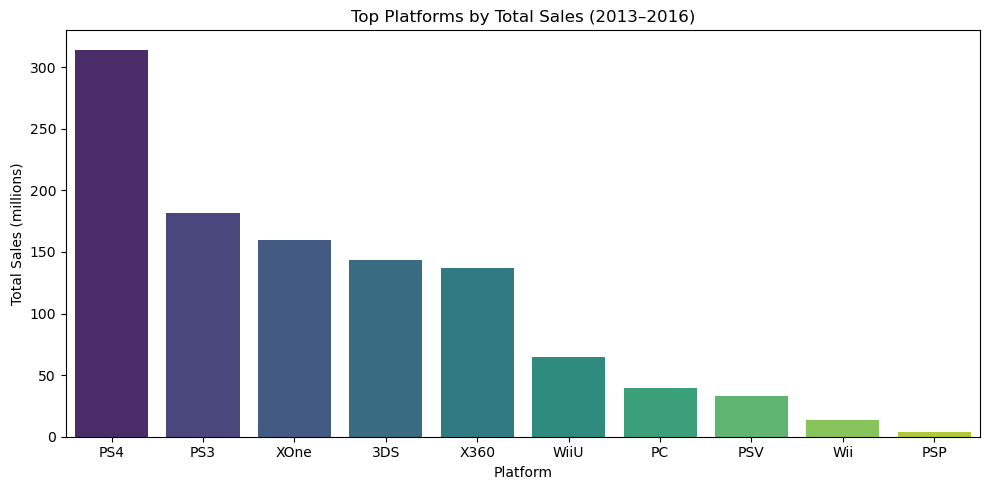

In [67]:
# Leading platforms
platform_sales_recent = (
    df_model.groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

display(platform_sales_recent.head(10))


plt.figure(figsize=(10, 5))
sns.barplot(data=platform_sales_recent.head(10), x='platform', y='total_sales', palette='viridis')
plt.title('Top Platforms by Total Sales (2013–2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (millions)')
plt.tight_layout()
plt.show()

Based on trends from 2013 to 2016, we recommend focusing on the following:

**Platforms to Prioritize**:
- **PS4**, **XOne**, and **3DS** show strong and sustained sales.
- Older platforms such as **PS2**, **Wii**, and **DS** have seen significant decline and can be excluded from 2017 campaigns.

**Genres to Promote**:
- **Action**, **Shooter**, and **Sports** genres consistently lead in global sales and should be core to any campaign.
- **Role-Playing** is particularly strong in Japan and worth considering for region-specific releases.

**Regional Insights**:
- North America and Europe favor console-based action/shooter games.
- Japan continues to show loyalty to handheld consoles and role-playing titles.

By focusing marketing efforts on the top-performing platforms and genres — and tailoring messaging by region — Ice can maximize its impact and revenue in 2017.


# Conclusion

This project explored video game sales data to uncover patterns in platform performance, genre popularity, and regional user behavior — with the ultimate goal of supporting 2017 sales forecasting.

Key findings include:

- 📈 **Game Releases Peaked** around 2008–2009, with a decline in new releases after 2011. For analysis and forecasting, data from **2013 to 2016** was used.
- 🎮 **Top Platforms** during this period were **PS4, XOne, PS3**, and **3DS**, with older platforms like **PS2** and **Wii** showing no significant sales after 2013.
- 🔁 **Platform Lifecycles** last ~7.6 years on average, with new consoles emerging roughly every 1.1 years.
- 🌍 **Regional preferences** varied:
  - **NA** and **EU** favor Action and Shooter games on home consoles.
  - **JP** strongly prefers Role-Playing games on handheld systems like 3DS and PSV.
- 🎯 **Top Genres** globally were Action, Shooter, and Sports — consistently leading in total and median sales.
- 🧪 **Hypothesis testing** showed:
  - No significant difference in user ratings between **Xbox One and PC** platforms.
  - A significant difference in user ratings between **Action and Sports** genres, suggesting genre-specific player satisfaction.

### Forecasting Strategy for 2017:
- Focus marketing and production efforts on **PS4, XOne, and 3DS** platforms.
- Prioritize development in **Action**, **Shooter**, and **Sports** genres globally.
- Adapt strategy regionally — especially for **Japan**, where handheld consoles and RPGs remain dominant.
- Exclude aging platforms with no recent sales, such as **PS2**.

By leveraging recent trends and user preferences, Ice can make informed, data-driven decisions about which platforms and genres to invest in for 2017 — ultimately boosting market impact and sales performance.